# Homework 5

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scipy.special as special
import astropy.units as u
import warnings
from scipy.integrate import quad
from sympy import *
import scipy.integrate as integ
%matplotlib inline
warnings.filterwarnings('ignore')

## Question 1:

For this problem, we need Friedmann's Equation: $H(t) = H_0 \cdot \sqrt{\Omega_r \cdot (a)^{-4} + \Omega_m \cdot (a)^{-3} + \Omega_\Lambda + (1-\Omega_0) \cdot (a)^{-2}}$

Where $\Omega_0 = \Omega_r + \Omega_m + \Omega_\Lambda$

We will also need the equation $H(t)=\large\frac{a'(t)}{a(t)}$ to solve for a(t) in terms of t.

### a) Loitering Universe

A Loitering Universe is one that is between a "Big Bounce" and a "Big Chill" universe.

For this problem, I am going to set $\Omega_r = 0$, $\Omega_m = .3$ and $\Omega_\Lambda = 1.7134$ (from Ryden pg. 116) which gives $\Omega_0 = 2.0134$.

In [280]:
def H(O_l, at):
    h = 70*(3.15e16/3e19)
    O_r = 0
    O_m = .3
    O_0 = 2.0134
    result = h*((O_r*(at**-4) + O_m*(at**-3) + O_l + (1-O_0)*(at**-2))**.5)
    return result

In [281]:
def time(O_l, a1, a2): 
    at = np.linspace(a1, a2, 1000)
    xs = lambda a: (H(O_l, a)*a)**(-1.0) 
    t = np.asarray([quad(xs, a1, i)[0] for i in at])
    return t

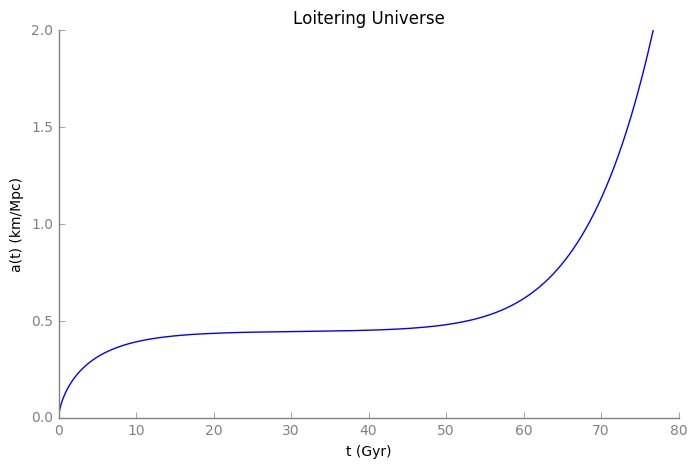

In [282]:
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
#ax.grid(True)
ax.spines['bottom'].set_color('grey')
ax.tick_params(axis='x', colors='grey')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='y', colors='grey')

ys = np.linspace(0.000001, 2.0, 1000)
variable = time(1.7134,.000001, 2.0)
plt.plot(variable , ys)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.xlabel('t (Gyr)')
plt.ylabel('a(t) (km/Mpc)')
plt.title('Loitering Universe')

Here we see that in this universe, a(t) stays about constant for a long time, until it starts growing very quickly.

### b) Big Crunch Universe

The Big Crunch Universe is when the universe expands to a certain point, and then collapses.

For this problem, I am going to set $\Omega_r = 0$, $\Omega_m = 1.5$ and $\Omega_\Lambda = 0$ which gives $\Omega_0 = 1.5$.

In [278]:
def H(O_l, at):
    h = 70*(3.15e16/3e19)
    O_r = 0
    O_m = 1.5
    O_0 = 1.5
    result = h*((O_r*(at**-4) + O_m*(at**-3) + O_l + (1-O_0)*(at**-2))**.5)
    return result

def time(O_l, a1, a2): 
    at = np.linspace(a1, a2, 1000)
    xs = lambda a: (H(O_l, a)*a)**(-1.0) 
    t = np.asarray([quad(xs, a1, i)[0] for i in at])
    return t

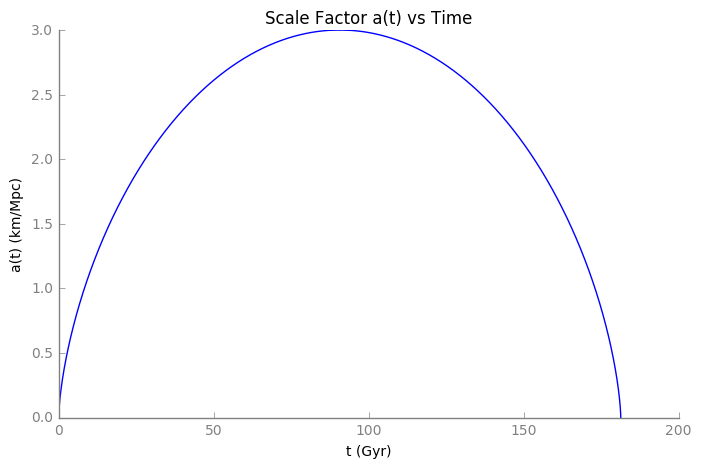

In [279]:
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
#ax.grid(True)
ax.spines['bottom'].set_color('grey')
ax.tick_params(axis='x', colors='grey')
ax.spines['left'].set_color('grey')
ax.tick_params(axis='y', colors='grey')


ys = linspace(.000001, 3.0, 1000)
variable = time(0, .000001, 3.0)
plt.plot(variable, ys)
part2 = variable[999]*2.0
plt.plot(part2 - variable, ys, color = 'b')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.xlabel('t (Gyr)')
plt.ylabel('a(t) (km/Mpc)')
plt.title('Scale Factor a(t) vs Time')

Here, we can see that universe starts out expanding very quickly, until it reaches a maximum time and scale factor, and then sadly collapses.

## Question 2:

For this problem, we want to show that velocity dispersion is related to angle of arc of an einstein ring through the equation $\normalsize\sigma_v \approx \small10^3 kms^{-1}\left(\large\frac{\theta}{28"} \frac{D_S}{D_{LS}}\right)^{\frac{1}{2}}$

Where the density profile of an isothermal sphere is $\rho(r) = \large\frac{\Large\sigma_v^2}{2\pi G r^2}$

We know that the deflection angle is $\tilde{\alpha} = \large\frac{4GM(r)}{c^2 r}$. 
Using the equation for the density profile, we can get the surface mass density, $\Sigma(r) = \large\frac{\sigma_v^2}{2Gr}$.
We can define the mass for a sphere as $M = 2\pi\int_0^r r'\cdot \Sigma(r') \, \mathrm{d} r\\ = \large\frac{\pi \sigma_v^2 r}{G}\\ \therefore \tilde{\alpha} = \large\frac{4\pi \sigma_v^2}{c^2}$ 

We can get the observed angle $\alpha$, where $\alpha = \large\frac{D_{LS}}{D_S D_L}\frac{4GM}{c^2 \theta}$, using the relationship $\alpha = \large\frac{D_{LS}}{D_S}\normalsize\tilde\alpha\\ \therefore \alpha = \large\frac{D_{LS}}{D_S}\frac{4\pi \sigma_v^2}{c^2} \normalsize\equiv \theta_E$

Moving terms around, we get $\normalsize\sigma_v^2 \approx \large\frac{c^2 \theta_E}{4\pi}\frac{D_S}{D_{LS}}$

For a value of $\sigma_v = 10^3kms^{-1} \to \left(\large\frac{\sigma_v}{10^3kms^{-1}}\right)^2 \approx \large\frac{\theta_E}{28"}\frac{D_S}{D_{LS}}\\ \to \normalsize\sigma_v \approx \small10^3kms^{-1} \large\sqrt{\frac{\theta_E}{28"}\frac{D_S}{D_{LS}}}$

The 28" comes from $4\pi\large\frac{(10^3kms^{-1})^2}{c^2}$ where $4\pi$ is converted from radians to arcseconds and c is $3x10^5 kms^{-1}$.